In [255]:
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = '5BwoEH6x8VTcx9HS8hca'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.lines as mlines


In [256]:
AAPLtrain = pd.read_csv('APPLtrain.csv')
AAPLtest = pd.read_csv('APPLtest.csv')

In [257]:
X_train = AAPLtrain.drop('increased',axis = 1)
X_test = AAPLtest.drop('increased', axis = 1)
y_train = AAPLtrain['increased']
y_test = AAPLtest['increased']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.524390243902439


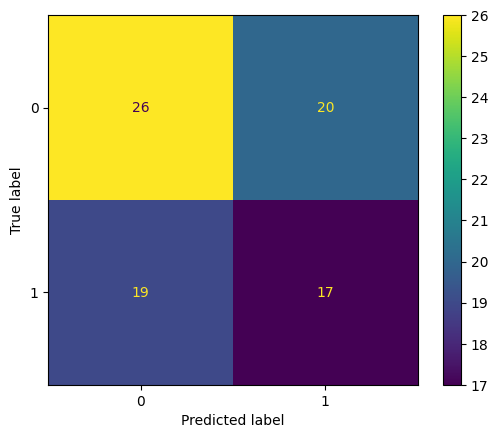

In [258]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

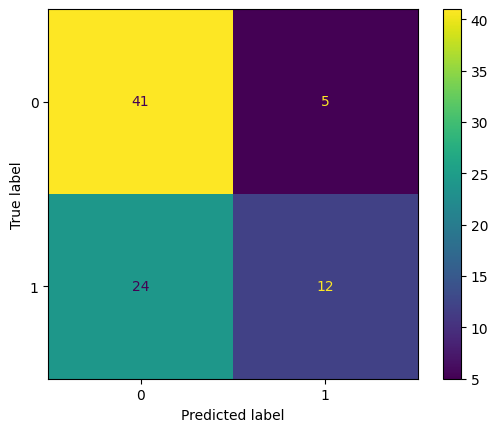

In [259]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

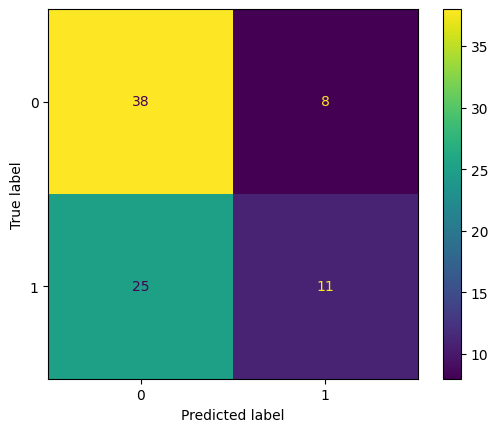

In [260]:
rf = RandomForestClassifier(n_estimators=100, random_state=32,min_weight_fraction_leaf = 0.05)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

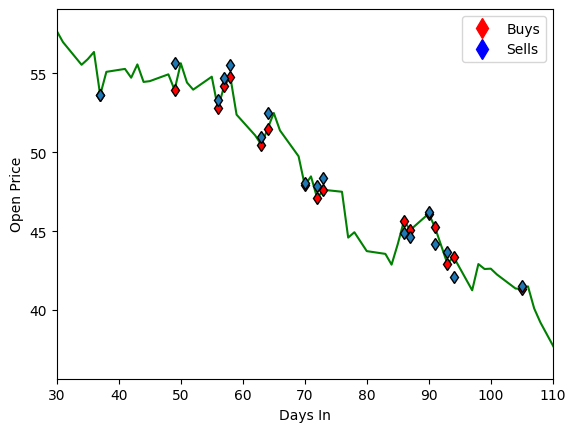

In [261]:
markers_on
plt.plot(AAPLtest['days_difference'],AAPLtest['Open'], '-gd', mfc = 'red',mec = 'black',markevery=markers_on)
plt.plot(AAPLtest['days_difference'],AAPLtest['Close'], 'd', markeredgecolor='black',markevery=markers_on)
plt.xlim([30,110])
plt.xlabel('Days In')
plt.ylabel('Open Price')
buys = mlines.Line2D([], [], color='red', marker='d', linestyle='None',
                          markersize=10, label='Buys')
red_square = mlines.Line2D([], [], color='blue', marker='d', linestyle='None',
                          markersize=10, label='Sells')
plt.legend(handles=[buys, red_square])

In [265]:
def days_inc(lis):
    count = 0
    for x in y_pred:
        if x == 1:
            lis.append(count)
        count+=1
markers_on = []
days_inc(markers_on)